In [76]:
import pandas as pd
gsdata= pd.read_table("C:\\Users\\Zebinisa\\Documents\\Testing\\rs1376240.txt")
gsdata

,Index,Sample ID,Call Rate,Gender,p05 Grn,p50 Grn,p95 Grn,p05 Red,p50 Red,p95 Red,...,p50 GC,Rep Error Rate,PC Error Rate,PPC Error Rate,Aux,Genotype for rs1376240,GC Score for rs1376240,Subset,Array Info.Sentrix ID,Array Info.Sentrix Position
0,1,01-01,0.816064,Unknown,312,3971,8618,794,4545,10246,...,0.792490,,,,0,AB,0.892395,NaN,207585740002,R01C01
1,433,01-01,0.992198,Unknown,199,2772,6303,417,2388,11251,...,0.812906,,,,0,BB,0.892395,NaN,207591070080,R01C01
2,2,01-02,0.991938,Unknown,325,4193,9057,650,4234,17682,...,0.812947,,,,0,BB,0.892395,NaN,207585740002,R02C01
3,3,01-03,0.991916,Unknown,359,4637,9877,713,4771,19131,...,0.812949,,,,0,AA,0.892395,NaN,207585740002,R03C01
4,4,01-07,0.992111,Unknown,381,5021,10389,775,5225,19921,...,0.812954,,,,0,BB,0.892395,NaN,207585740002,R04C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,575,15-17m,0.985298,Unknown,482,4138,11313,704,1976,12028,...,0.810984,,,,0,AA,0.892395,NaN,207591070021,R12C02
619,545,15-24m,0.991153,Unknown,371,4481,8923,676,3482,12485,...,0.812682,,,,0,BB,0.892395,NaN,207591070004,R06C02
620,550,20-05,0.853896,Unknown,493,5591,11882,928,4935,16392,...,0.793251,,,,0,AB,0.876928,NaN,207591070004,R11C02
621,92,M15-09,0.992764,Unknown,136,1943,4825,197,1138,5836,...,0.812947,,,,0,BB,0.892395,NaN,207585740024,R08C02


In [75]:
import pandas as pd

# Read genotype data
genotype_data = pd.read_table("C:\\Users\\Zebinisa\\Documents\\Testing\\rs1376240.txt")

# Read phenotype data
phenotype_data = pd.read_csv(r'C:\Users\Zebinisa\Downloads\GWAS - Sheet1.csv')

# Filter phenotype data for cases and controls
cases = phenotype_data[phenotype_data["Phenotype Value"] == 2]
controls = phenotype_data[phenotype_data["Phenotype Value"] == 1]

# Merge genotype data with phenotype data for cases and controls
cases_genotype = pd.merge(cases, genotype_data, left_on="Sample ID", right_on="Sample ID")
controls_genotype = pd.merge(controls, genotype_data, left_on="Sample ID", right_on="Sample ID")

# Count genotypes for cases and controls
cases_genotype_counts = cases_genotype["Genotype for rs1376240"].value_counts()
controls_genotype_counts = controls_genotype["Genotype for rs1376240"].value_counts()

print("Genotype counts for cases:")
print(cases_genotype_counts)

print("\nGenotype counts for controls:")
print(controls_genotype_counts)


Genotype counts for cases:
Genotype for rs1376240
BB    77
AB    48
AA    11
Name: count, dtype: int64

Genotype counts for controls:
Genotype for rs1376240
BB    187
AB    117
AA     32
NC      3
Name: count, dtype: int64


# Extracting data for genotyped samples. 


#From here its partially automated, therefore make sure you have already downloaded all the txt files from GS which you need!!!

In [86]:
import pandas as pd
import os

# Directory containing genotype data files
genotype_folder = "C:\\Users\\Zebinisa\\Documents\\Testing\\"
# Create a new folder for outputs
output_folder = os.path.join(genotype_folder, "Genotypes")
os.makedirs(output_folder, exist_ok=True)

# Directory containing phenotype data
phenotype_file = r'C:\Users\Zebinisa\Downloads\GWAS - Sheet1.csv'

# Read phenotype data
phenotype_data = pd.read_csv(phenotype_file)

# Get list of all files in the genotype folder
genotype_files = [file for file in os.listdir(genotype_folder) if file.endswith('.txt')]

# Process each genotype file
for file_name in genotype_files:
    file_path = os.path.join(genotype_folder, file_name)
    print(f"Processing file: {file_name}")
    
    # Read genotype data
    genotype_data = pd.read_table(file_path)
    
    # Merge genotype data with phenotype data for cases and controls
    cases = phenotype_data[phenotype_data["Phenotype Value"] == 2]
    controls = phenotype_data[phenotype_data["Phenotype Value"] == 1]
    
    cases_genotype = pd.merge(cases, genotype_data, on="Sample ID")
    controls_genotype = pd.merge(controls, genotype_data, on="Sample ID")
    
    # Concatenate cases and controls data
    combined_data = pd.concat([cases_genotype, controls_genotype])
    
    # Select the required columns in the specified order
    output_data = combined_data[["Sample ID", "Call Rate", "Phenotype Value", f"Genotype for {file_name[:-4]}"]]
    
    # Save to a text file with formatted columns in the output folder
    output_file = os.path.join(output_folder, f"{file_name[:-4]}_genotype.txt")
    output_data.to_csv(output_file, sep='\t', index=False, na_rep='NA')
    
    print(f"Data has been saved to {file_name[:-4]}_genotype.txt in the Genotypes folder.")

Processing file: rs1051266.txt
Data has been saved to rs1051266_genotype.txt in the Genotypes folder.
Processing file: rs1051296.txt
Data has been saved to rs1051296_genotype.txt in the Genotypes folder.
Processing file: rs1051298.txt
Data has been saved to rs1051298_genotype.txt in the Genotypes folder.
Processing file: rs12659.txt
Data has been saved to rs12659_genotype.txt in the Genotypes folder.
Processing file: rs1376240.txt
Data has been saved to rs1376240_genotype.txt in the Genotypes folder.
Processing file: rs1799963.txt
Data has been saved to rs1799963_genotype.txt in the Genotypes folder.
Processing file: rs1801131.txt
Data has been saved to rs1801131_genotype.txt in the Genotypes folder.
Processing file: rs1801133.txt
Data has been saved to rs1801133_genotype.txt in the Genotypes folder.
Processing file: rs1805087.txt
Data has been saved to rs1805087_genotype.txt in the Genotypes folder.
Processing file: rs2227631.txt
Data has been saved to rs2227631_genotype.txt in the Ge

# Hamma mutatsiya fayllarini yigib tepdagi kodlarda yozib chiqqaningizga ichonch hosil qiling!!!

In [87]:
import pandas as pd
import glob

# Directory containing the genotype files
directory_path = "C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\"

# Get all files ending with _genotype.txt in the directory
file_paths = glob.glob(directory_path + "*_genotype.txt")

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each file and merge them
for file_path in file_paths:
    # Read the genotype data
    genotype_data = pd.read_csv(file_path, delimiter='\t')
    
    # Extract the genotype column name (excluding "Sample ID" and "Phenotype Value")
    genotype_column = [col for col in genotype_data.columns if col not in ["Sample ID", "Phenotype Value"]][0]
    
    # Rename the genotype column to include the SNP identifier
    snp_identifier = genotype_column.split(' ')[-1]
    genotype_data.rename(columns={genotype_column: snp_identifier}, inplace=True)
    
    # Merge with the combined data
    if combined_data.empty:
        combined_data = genotype_data
    else:
        # Merge on "Sample ID" and "Phenotype Value" columns
        combined_data = pd.merge(combined_data, genotype_data, on=["Sample ID", "Phenotype Value"], how="outer", suffixes=('', '_new'))

# Save the combined data to a CSV file
output_file_path = directory_path + "combined_genotype_data.csv"
combined_data.to_csv(output_file_path, index=False)

print("Data has been saved to combined_genotype_data.csv")


Data has been saved to combined_genotype_data.csv


In [88]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\combined_genotype_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

  Sample ID      Rate  Phenotype Value Genotype for rs1051266  Rate_new  \
0     01-01  0.816064              2.0                     AA  0.816064   
1     01-01  0.816064              2.0                     AA  0.816064   
2     01-01  0.816064              2.0                     AA  0.816064   
3     01-01  0.816064              2.0                     AA  0.816064   
4     01-01  0.816064              2.0                     AA  0.816064   

  Genotype for rs1051296  Rate_new.1 Genotype for rs1051298  Rate_new.2  \
0                     AB    0.816064                     NC    0.816064   
1                     AB    0.816064                     NC    0.816064   
2                     AB    0.816064                     NC    0.816064   
3                     AB    0.816064                     NC    0.816064   
4                     AB    0.816064                     NC    0.816064   

  Genotype for rs12659  ...  Rate_new.6 Genotype for rs1801133  Rate_new.7  \
0                   

# Duplikatlarni tozalab oling! CAll ratega asoslanib

In [89]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\combined_genotype_data.csv')

# Get all columns starting with 'Rate_'
rate_columns = [col for col in df.columns if col.startswith('Rate_')]

# Sort DataFrame by 'Rate_' columns in descending order within each 'Sample ID' group
df_sorted = df.sort_values(by=['Sample ID'] + rate_columns, ascending=[True] + [False]*len(rate_columns))

# Drop duplicates keeping the first occurrence (highest values of 'Rate_' columns)
df_cleaned = df_sorted.drop_duplicates(subset='Sample ID', keep='first')

# Remove 'Rate_' columns from the cleaned DataFrame
df_cleaned = df_cleaned.drop(rate_columns, axis=1)

# Save cleaned DataFrame to CSV
df_cleaned.to_csv('C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\genotypes_cleaned.csv', index=False)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())
print(df_cleaned.tail())


     Sample ID      Rate  Phenotype Value Genotype for rs1051266  \
2047     01-01  0.816064              2.0                     AA   
4096     01-02  0.991938              2.0                     AA   
4097     01-11  0.991216              2.0                     AB   
4098     01-17  0.992700              2.0                     AB   
8194     01-26  0.990790              2.0                     AB   

     Genotype for rs1051296 Genotype for rs1051298 Genotype for rs12659  \
2047                     AA                     BB                   BB   
4096                     BB                     AA                   AA   
4097                     AB                     AB                   AB   
4098                     AB                     AB                   AB   
8194                     AB                     AB                   AB   

     Genotype for rs1376240 Genotype for rs1799963 Genotype for rs1801131  \
2047                     BB                     BB             

In [98]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\genotypes_cleaned.csv')

# Separate data into control and case groups
control_df = df[df['Phenotype Value'] == 1.0]
case_df = df[df['Phenotype Value'] == 2.0]

# Get all genotype columns dynamically
genotype_columns = [col for col in df.columns if col.startswith('Genotype for ')]

# Function to calculate genotype counts for a given DataFrame
def calculate_genotype_counts(dataframe, columns):
    genotype_counts = {}
    for col in columns:
        counts = dataframe[col].value_counts(dropna=False)
        genotype_counts[col] = counts.reindex(['AA', 'AB', 'BB', 'NC'], fill_value=0)
    return genotype_counts

# Calculate genotype counts for control and case groups
control_genotype_counts = calculate_genotype_counts(control_df, genotype_columns)
case_genotype_counts = calculate_genotype_counts(case_df, genotype_columns)

# Format output into DataFrames
def format_genotype_counts(genotype_counts):
    formatted_df = pd.DataFrame(genotype_counts).transpose()
    return formatted_df

control_df_formatted = format_genotype_counts(control_genotype_counts)
case_df_formatted = format_genotype_counts(case_genotype_counts)

# Merge control and case dataframes for combined output
combined_df = pd.concat([control_df_formatted, case_df_formatted], keys=['Control', 'Case'])

# Save combined results to a single CSV file
output_file = 'C:\\Users\\Zebinisa\\Documents\\Testing\\Genotypes\\combined_genotype_counts.csv'
combined_df.to_csv(output_file)

# Print confirmation message
print(f"Combined genotype counts saved to {output_file}")


Combined genotype counts saved to C:\Users\Zebinisa\Documents\Testing\Genotypes\combined_genotype_counts.csv


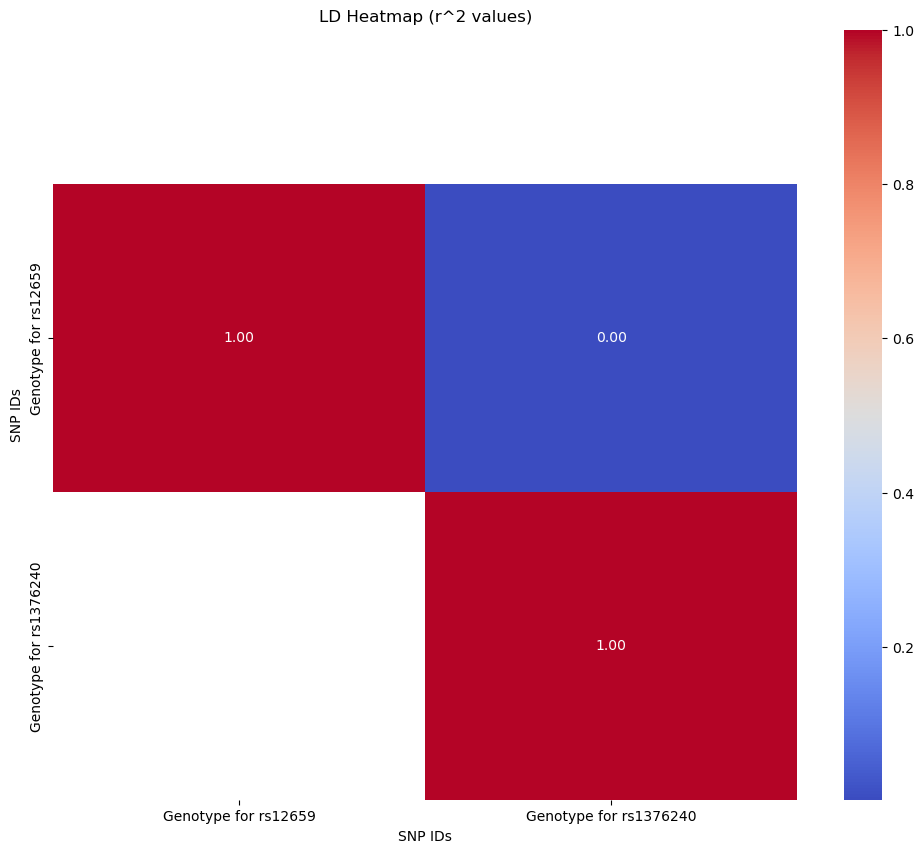

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ld_matrix is your LD matrix and genotype_cols are your SNP IDs

# Create a triangular mask to display only the lower triangular part of the LD matrix
mask = np.tri(len(ld_matrix), k=-1)

# Visualize LD heatmap in triangular format
plt.figure(figsize=(12, 10))
sns.heatmap(ld_matrix, mask=mask, xticklabels=genotype_cols, yticklabels=genotype_cols, cmap='coolwarm', annot=True, fmt=".2f")
plt.gca().set_ylim(len(ld_matrix), -0.5)  # Reverse the y-axis to start from the bottom
plt.xlabel('SNP IDs')
plt.ylabel('SNP IDs')
plt.title('LD Heatmap (r^2 values)')
plt.show()
